# **Predit Churners (Sklearn + H2O)**

This note is intended to go over various classifiers and compare sklearn and H2O. Here we are tentative to answer a question: how to predict which customers are going to or about becoming churners, in which most comapines are interested in knowing. The dataset is from [UCI Machine Learning repository](https://raw.githubusercontent.com/EricChiang/churn/master/data/churn.csv). 

We perform different classification methods to test which model has advantage and provides best results. The machine learning outcomes here are compared to the [blog](http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html) using sklearn and H2O. In particular, we will implement deep learning from H2O to compute the accuracy.

#### **Keywords: sklean/H2O classifiers, 10-fold cross-validation, deep learning**

## **The Data**

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/hsianghung/Desktop/churn.csv')

In [2]:
data.head(4)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.


In [3]:
data.shape

(3333, 21)

Here my focus is on analyzing how the consumers' behavior influences whether they will be churners or not. So I will take the State, Phone, and Area code away from Data:

In [4]:
del data['State']
del data['Phone']
del data['Area Code']

In [4]:
data.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
data.columns

Index([u'Account Length', u'Int'l Plan', u'VMail Plan', u'VMail Message',
       u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls',
       u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge',
       u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls',
       u'Churn?'],
      dtype='object')

In [6]:
data = pd.get_dummies(data)
data.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes,Churn?_False.,Churn?_True.
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,10.0,3,2.70,1,1.0,0.0,0.0,1.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,13.7,3,3.70,1,1.0,0.0,0.0,1.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,12.2,5,3.29,0,1.0,0.0,1.0,0.0,1.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,6.6,7,1.78,2,0.0,1.0,1.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,10.1,3,2.73,3,0.0,1.0,1.0,0.0,1.0,0.0


Also remove some redundant features from dummy variables (to reduce the feature dimension): 

In [86]:
del data["Int'l Plan_no"]
del data["VMail Plan_no"]
del data["Churn?_False."]

In [87]:
data.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Int'l Plan_yes,VMail Plan_yes,Churn?_True.
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1.0,0.0,0.0


In [7]:
data.columns

Index([u'Account Length', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Int'l Plan_no', u'Int'l Plan_yes',
       u'VMail Plan_no', u'VMail Plan_yes', u'Churn?_False.', u'Churn?_True.'],
      dtype='object')

In [88]:
X = data.loc[:,:'VMail Plan_yes']
X.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Int'l Plan_yes,VMail Plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,1.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,1.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1.0,0.0


In [89]:
X.shape

(3333, 17)

In [13]:
y = data.loc[:,'Churn?_True.']
y.head(20)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    1.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: Churn?_True., dtype: float64

## **Separate Data in Training and Test datasets**

In [14]:
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn import grid_search

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## **Sklearn Machine Learning Classifier**

### **a. Logistic regression**

In [96]:
best_logreg_model = None
max_score = -1
best_reg = -1
for regularization_param in [0.01, 0.1, 1, 2, 10, 100, 500, 1000, 5000]:
    logreg = linear_model.LogisticRegression('l2', C=regularization_param)
    cv_score = cross_val_score(logreg, X_train, y_train, cv=10)
    print (regularization_param, np.mean(cv_score))
    if np.mean(cv_score) > max_score:
        max_score = np.mean(cv_score)
        best_logreg_model = logreg
        best_reg = regularization_param
        
best_logreg_model.fit(X_train, y_train)
print 'best reg =', best_reg
print 'accuracy = ', best_logreg_model.score(X_test, y_test)

(0.01, 0.8645545803086131)
(0.1, 0.86799918792667052)
(1, 0.86885940695878539)
(2, 0.8697140920020896)
(10, 0.87185639393904901)
(100, 0.87142719357829601)
(500, 0.87271292891575558)
(1000, 0.87271292891575558)
(5000, 0.87271292891575558)
best reg = 500
accuracy =  0.841


In [97]:
logreg_y_test_prob = best_logreg_model.predict_proba(X_test)

### **b. k-nearest-neighbor classifier**

In [98]:
from sklearn.neighbors import KNeighborsClassifier
best_knn_model = None
best_k = -1
max_score = -1
for n_neighbors in [1,2,3,5,6,7,8,9,10,20]:
    KNN = KNeighborsClassifier(n_neighbors)
    cv_score = cross_val_score(KNN, X_train, y_train, cv=10)
    acc = np.mean(cv_score) 
    print (n_neighbors, acc)
    if acc > max_score:
        best_k = n_neighbors
        max_score = acc
        best_knn_model = KNN

best_knn_model.fit(X_train, y_train)
print('best K is:', best_k)
print best_knn_model.score(X_test, y_test)

(1, 0.82810482070508706)
(2, 0.87784105498697773)
(3, 0.87654431491748352)
(5, 0.88469335061202747)
(6, 0.88426419768546438)
(7, 0.88769767408031419)
(8, 0.88513730300580973)
(9, 0.88727772338657351)
(10, 0.88513915293921208)
(20, 0.88171299722098895)
('best K is:', 7)
0.859


In [99]:
knn_y_test_prob = best_knn_model.predict_proba(X_test)

### **c. LDA**

In [93]:
from sklearn.lda import LDA
lda = LDA()
lda.fit(X_train, y_train)
print ('ACC: ', lda.score(X_test, y_test))

('ACC: ', 0.83499999999999996)


In [94]:
lda_y_test_prob = lda.predict_proba(X_test)

### **d. QDA**

In [91]:
from sklearn.qda import QDA
qda = QDA()
qda.fit(X_train, y_train)
print ('ACC:', qda.score(X_test, y_test))

('ACC:', 0.86099999999999999)


In [92]:
qda_y_test_prob = qda.predict_proba(X_test)

### **e. Support vector machine**

In [58]:
from sklearn import svm

In [112]:
best_svm_model = None
best_Cs = -1
max_score = -1
for Cs in [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10, 15, 20]:
    svc = svm.SVC(kernel='linear', C=Cs, probability=True)
    ### not suggest to do cv in SVM since it costs time a lot, even an iteration
    #cv_score = cross_val_score(svc, X_train, y_train, cv=5) 
    svc.fit(X_train, y_train)
    acc = svc.score(X_test, y_test)
    print (Cs, acc)
    if acc > max_score:
        best_Cs = Cs
        max_score = acc
        best_svm_model = svc

best_svm_model.fit(X_train, y_train)
print ('best C =', best_Cs)
print ('ACC: ', best_svm_model.score(X_test, y_test))

(1.0, 0.84199999999999997)
(2.0, 0.84299999999999997)
(3.0, 0.84799999999999998)
(4.0, 0.84999999999999998)
(5.0, 0.85199999999999998)
(7.0, 0.84699999999999998)
(10, 0.84899999999999998)
(15, 0.84399999999999997)
(20, 0.83999999999999997)
('best C =', 5.0)
('ACC: ', 0.85199999999999998)


In [113]:
svm_y_test_prob = best_svm_model.predict_proba(X_test)

In [26]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
rbf_svc.fit(X_train, y_train)
print ('ACC: ', rbf_svc.score(X_test, y_test))

('ACC: ', 0.86636363636363634)


In [108]:
C = 6.0
linear_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
linear_svc.fit(X_train, y_train)
print ('ACC: ', linear_svc.score(X_test, y_test))

('ACC: ', 0.84999999999999998)


### **f. Decision tree**

In [109]:
best_tree_model = None
best_nfeatures = -1
best_depth = -1
max_score = -1
for features in [4, 8, 12, 16]:
    for depth in [5, 10, 15, 20]:
        tree = DecisionTreeClassifier(max_features = features, max_depth = depth, random_state=0)
        cv_score = cross_val_score(tree, X_train, y_train, cv=10)  
        acc = np.mean(cv_score) 
        print (features, depth, acc)
        if acc > max_score:
            best_nfeatures = features 
            best_depth = depth
            best_tree_model = tree
            max_score = acc
            

best_tree_model.fit(X_train, y_train)
print ('best param =', best_nfeatures, best_depth)
print ('ACC: ', best_tree_model.score(X_test, y_test))

(4, 5, 0.89883640770128859)
(4, 10, 0.90056596894135732)
(4, 15, 0.88599382217111966)
(4, 20, 0.87913045856844874)
(8, 5, 0.92070292093416273)
(8, 10, 0.9215815602433185)
(8, 15, 0.90614181051875298)
(8, 20, 0.89842371443858782)
(12, 5, 0.91855511663118583)
(12, 10, 0.92371092845785763)
(12, 15, 0.9190045397681923)
(12, 20, 0.90829690387556306)
(16, 5, 0.91899168510275531)
(16, 10, 0.92842096958013798)
(16, 15, 0.91170283681753284)
(16, 20, 0.9048597592367017)
('best param =', 16, 10)
('ACC: ', 0.94399999999999995)


In [110]:
tree_y_test_prob = best_tree_model.predict_proba(X_test)

### **g. Random forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print ('ACC:', rf.score(X_test, y_test))

('ACC:', 0.93600000000000005)


In [104]:
rf = RandomForestClassifier()
parameters = {'n_estimators': [6,7,8,9,10,12,14,16],'max_depth':[5,10,15],'min_samples_leaf':[10,20]}
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2,n_jobs=-1)
model_cv_grid.fit(X_train,y_train)
best_rf_model = model_cv_grid.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] n_estimators=6, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=6, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=6, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=7, max_depth=5, min_samples_leaf=10 ................
[CV] ....... n_estimators=6, max_depth=5, min_samples_leaf=10 -   0.1s
[CV] ....... n_estimators=6, max_depth=5, min_samples_leaf=10 -   0.1s
[CV] n_estimators=7, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=7, max_depth=5, min_samples_leaf=10 ................
[CV] ....... n_estimators=6, max_depth=5, min_samples_leaf=10 -   0.1s
[CV] ....... n_estimators=7, max_depth=5, min_samples_leaf=10 -   0.1s
[CV] n_estimators=8, max_depth=5, min_samples_leaf=10 ................
[CV] n_estimators=8, max_depth=5, min_samples_leaf=10 ................
[CV] ....... n_estimators=7, max_depth=5, min_samples_leaf=10 -   0.1s
[CV] n_estimato

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.3s


[CV] ..... n_estimators=12, max_depth=10, min_samples_leaf=10 -   0.2s
[CV] n_estimators=16, max_depth=10, min_samples_leaf=10 ..............
[CV] ..... n_estimators=14, max_depth=10, min_samples_leaf=10 -   0.2s
[CV] n_estimators=14, max_depth=10, min_samples_leaf=10 ..............
[CV] ..... n_estimators=14, max_depth=10, min_samples_leaf=10 -   0.2s
[CV] ..... n_estimators=12, max_depth=10, min_samples_leaf=10 -   0.2s
[CV] n_estimators=16, max_depth=10, min_samples_leaf=10 ..............
[CV] n_estimators=6, max_depth=10, min_samples_leaf=20 ...............
[CV] ..... n_estimators=16, max_depth=10, min_samples_leaf=10 -   0.2s
[CV] n_estimators=16, max_depth=10, min_samples_leaf=10 ..............
[CV] ...... n_estimators=6, max_depth=10, min_samples_leaf=20 -   0.1s
[CV] ..... n_estimators=14, max_depth=10, min_samples_leaf=10 -   0.1s
[CV] n_estimators=6, max_depth=10, min_samples_leaf=20 ...............
[CV] n_estimators=6, max_depth=10, min_samples_leaf=20 ...............
[CV] .

[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    5.2s finished


In [105]:
print ('ACC:', best_rf_model.score(X_test, y_test))

('ACC:', 0.91900000000000004)


In [106]:
rf_y_test_prob = best_rf_model.predict_proba(X_test)

In [107]:
importance = best_rf_model.feature_importances_
attribute = X.columns

v = sorted(range(len(importance)), key=lambda k: importance[k], reverse=True)
sorted_importance = [importance[i] for i in v]
sorted_attribute = [attribute[i] for i in v]

df_importance = pd.DataFrame({'variable': sorted_attribute, 'importance' : sorted_importance})
df_importance.sort_index().head(5)

,importance,variable
0,0.214102,Day Charge
1,0.177404,Day Mins
2,0.166280,CustServ Calls
3,0.096709,Int'l Plan_yes
4,0.072140,Eve Charge


## **ROC visualization**

In [69]:
from sklearn import metrics, cross_validation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 3})
%matplotlib inline

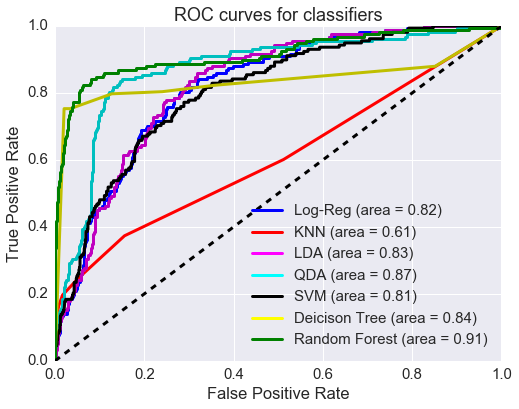

In [114]:
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test, logreg_y_test_prob[:,1])
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)

fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, knn_y_test_prob[:,1])
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

fpr_lda, tpr_lda, _ = metrics.roc_curve(y_test, lda_y_test_prob[:,1])
roc_auc_lda = metrics.auc(fpr_lda, tpr_lda)

fpr_qda, tpr_qda, _ = metrics.roc_curve(y_test, qda_y_test_prob[:,1])
roc_auc_qda = metrics.auc(fpr_qda, tpr_qda)

fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_y_test_prob[:,1])
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test, tree_y_test_prob[:,1])
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)

fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, rf_y_test_prob[:,1])
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, color = 'b')
plt.plot(fpr_knn, tpr_knn, color = 'r')   #m: magenta
plt.plot(fpr_lda, tpr_lda, color = 'm')
plt.plot(fpr_qda, tpr_qda, color = 'c')
plt.plot(fpr_svm, tpr_svm, color = 'k')
plt.plot(fpr_tree, tpr_tree, color = 'y')
plt.plot(fpr_rf, tpr_rf, color = 'g')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for classifiers')

blue_line = mlines.Line2D([], [], color='blue', label='Log-Reg (area = %0.2f)' % roc_auc_logreg)
red_line = mlines.Line2D([], [], color='red', label='KNN (area = %0.2f)' % roc_auc_knn)
magneta_line = mlines.Line2D([], [], color='magenta', label='LDA (area = %0.2f)' % roc_auc_lda)
cyan_line = mlines.Line2D([], [], color='cyan', label='QDA (area = %0.2f)' % roc_auc_qda)
black_line = mlines.Line2D([], [], color='black', label='SVM (area = %0.2f)' % roc_auc_svm)
yellow_line = mlines.Line2D([], [], color='yellow', label='Deicison Tree (area = %0.2f)' % roc_auc_tree)
green_line = mlines.Line2D([], [], color='green', label='Random Forest (area = %0.2f)' % np.mean(roc_auc_rf))

plt.legend(handles=[blue_line, red_line,magneta_line, cyan_line, black_line, yellow_line, green_line],loc="lower right")

## **Precision and Recall**

In [76]:
from sklearn.metrics import confusion_matrix

In [117]:
models = {'log reg,': best_logreg_model, 'KNN,': best_knn_model, 'LDA,': lda, 'QDA,': qda, 'SVM,': best_svm_model, 
          'Decision Tree,': best_tree_model, 'Random Forest,':best_rf_model}
actual_pos = np.sum(y_test == 1)
for model in models:
    y_pred = models[model].predict(X_test)
    conf = confusion_matrix(y_test, y_pred, labels =[1,0])
    pred_pos = np.sum(y_pred == 1)
    precision = conf[0,0]/float(actual_pos)
    recall = conf[0,0]/float(pred_pos)
    print model, np.mean(y_test == y_pred)
    print conf
    print 'P=', precision, 'R=', recall, 'F1=', 2*precision*recall/(precision+recall)
    print '-----------'

KNN, 0.859
[[ 31 127]
 [ 14 828]]
P= 0.196202531646 R= 0.688888888889 F1= 0.305418719212
-----------
QDA, 0.861
[[ 89  69]
 [ 70 772]]
P= 0.563291139241 R= 0.559748427673 F1= 0.561514195584
-----------
SVM, 0.852
[[ 20 138]
 [ 10 832]]
P= 0.126582278481 R= 0.666666666667 F1= 0.212765957447
-----------
LDA, 0.835
[[ 38 120]
 [ 45 797]]
P= 0.240506329114 R= 0.457831325301 F1= 0.315352697095
-----------
log reg, 0.841
[[ 30 128]
 [ 31 811]]
P= 0.189873417722 R= 0.491803278689 F1= 0.27397260274
-----------
Random Forest, 0.919
[[ 86  72]
 [  9 833]]
P= 0.544303797468 R= 0.905263157895 F1= 0.679841897233
-----------
Decision Tree, 0.944
[[119  39]
 [ 17 825]]
P= 0.753164556962 R= 0.875 F1= 0.809523809524
-----------


The best model is the **decision tree model**, which offers the best F1 score, and then **random forest model**. 

# **H2O Machine Learning Classifier**

In [118]:
import h2o

In [119]:
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

H2O cluster uptime:,5 hours 1 minutes 6 seconds 343 milliseconds
H2O cluster version:,3.8.3.3
H2O cluster name:,H2O_started_from_python_hsianghung_vuh590
H2O cluster total nodes:,1
H2O cluster total free memory:,6.82 GB
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321
H2O Connection proxy:,None


In [120]:
data = h2o.import_file('/Users/hsianghung/Desktop/churn.csv')  # 163,987 rows x 15 columns


Parse Progress: [##################################################] 100%


In [121]:
data.shape

(3333, 21)

In [122]:
type(data)

h2o.frame.H2OFrame

In [124]:
data.head(5)

State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [129]:
data['Churn?'] = data['Churn?'].asfactor()

In [130]:
data['Churn?'].levels()

[['False.', 'True.']]

In [162]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility

splits = data.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [163]:
print train.nrow
print valid.nrow
print test.nrow

2342
498
493


In [137]:
x = list(data.columns)

In [138]:
x.remove('State')
x.remove('Phone')
x.remove('Area Code')
x.remove('Churn?')

In [142]:
y= 'Churn?'

In [139]:
x

[u'Account Length',
 u"Int'l Plan",
 u'VMail Plan',
 u'VMail Message',
 u'Day Mins',
 u'Day Calls',
 u'Day Charge',
 u'Eve Mins',
 u'Eve Calls',
 u'Eve Charge',
 u'Night Mins',
 u'Night Calls',
 u'Night Charge',
 u'Intl Mins',
 u'Intl Calls',
 u'Intl Charge',
 u'CustServ Calls']

### **a. Random Forest**

In [140]:
# Import H2O RF:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [143]:
# Initialize the RF estimator:

rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', seed=1)
rf_fit1.train(x=x, y=y, training_frame=train)


drf Model Build Progress: [##################################################] 100%


In [144]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', ntrees=100, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)


drf Model Build Progress: [##################################################] 100%


In [148]:
rf_fit3 = H2ORandomForestEstimator(model_id='rf_fit3', seed=1, nfolds=5)
rf_fit3.train(x=x, y=y, training_frame=data)


drf Model Build Progress: [##################################################] 100%


In [152]:
rf_perf1 = rf_fit1.model_performance(test)
rf_perf2 = rf_fit2.model_performance(test)
rf_perf3 = rf_fit3.model_performance(test)

# Retreive test set AUC
print rf_perf1.auc()
print rf_perf2.auc()
print rf_perf3.auc()

0.944590222861
0.935873472322
1.0


In [154]:
print rf_fit3.auc(xval=True)

0.91113944281


### **b. Deep learning**

In [164]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [165]:
# Initialize and train the DL estimator:

dl_fit1 = H2ODeepLearningEstimator(model_id='dl_fit1', seed=1)
dl_fit1.train(x=x, y=y, training_frame=train)


deeplearning Model Build Progress: [##################################################] 100%


In [166]:
dl_fit2 = H2ODeepLearningEstimator(model_id='dl_fit2', 
                                   epochs=20, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl_fit2.train(x=x, y=y, training_frame=train)


deeplearning Model Build Progress: [##################################################] 100%


In [167]:
dl_fit3 = H2ODeepLearningEstimator(model_id='dl_fit3', 
                                   epochs=20, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)


deeplearning Model Build Progress: [##################################################] 100%


In [168]:
dl_perf1 = dl_fit1.model_performance(test)
dl_perf2 = dl_fit2.model_performance(test)
dl_perf3 = dl_fit3.model_performance(test)
# Retreive test set AUC
print dl_perf1.auc()
print dl_perf2.auc()
print dl_perf3.auc()

0.920542774982
0.919734004313
0.929169662114
